# bulbea
> Deep Learning based Python Library for Stock Market Prediction and Modelling

![](bulbea.png)

A canonical way of importing the `bulbea` module is as follows:

In [1]:
import bulbea as bb

### `bulbea.Share`

In order to analyse a desired share, we use the `Share` object defined under `bulbea` which considers 2 arguments - *the **source code** for the economic data* and *the **ticker symbol** for a said company*.

In [2]:
source, ticker = 'YAHOO', 'INDEX_GSPC'

Go ahead and create a `Share` object as follows:

In [3]:
share = bb.Share(source, ticker)

wrong


By default, a `Share` object for a said source and symbol provides you historical data since a company's inception, as a `pandas.DataFrame` object. In order to access the same, use the `Share` object's member variable - `data` as follows:

In [4]:
data     = share.data
nsamples = 5
data.tail(nsamples)

,Open,High,Low,Close,Volume,Adjusted Close
Date,,,,,,
2017-03-15,2370.340088,2390.010010,2368.939941,2385.260010,3.906840e+09,2385.260010
2017-03-16,2387.709961,2388.100098,2377.179932,2381.379883,3.365660e+09,2381.379883
2017-03-17,2383.709961,2385.709961,2377.639893,2378.250000,5.178040e+09,2378.250000
2017-03-20,2378.239990,2379.550049,2369.659912,2373.469971,3.054930e+09,2373.469971
2017-03-21,2379.320068,2381.929932,2341.899902,2344.020020,4.265590e+09,2344.020020


In order to analyse a given attribute, you could plot the same as follows:

In [5]:
figsize = (20, 15)

% matplotlib inline

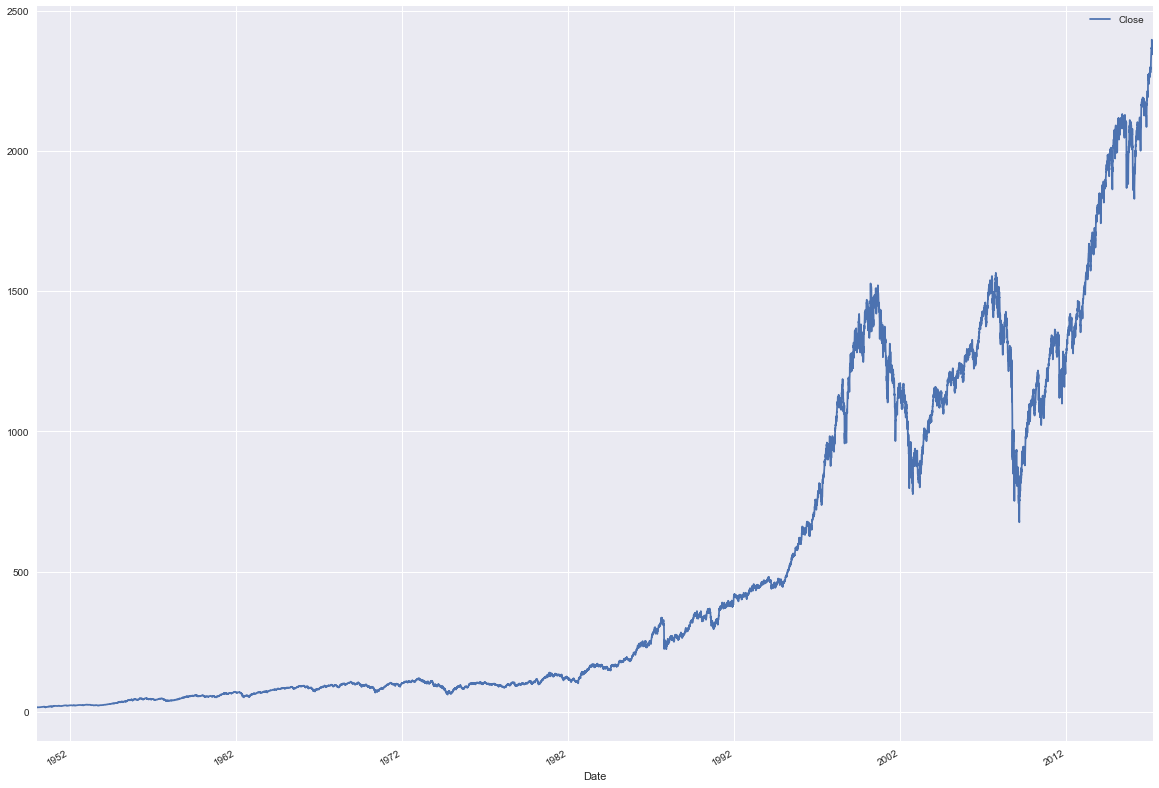

In [6]:
share.plot(figsize = figsize)

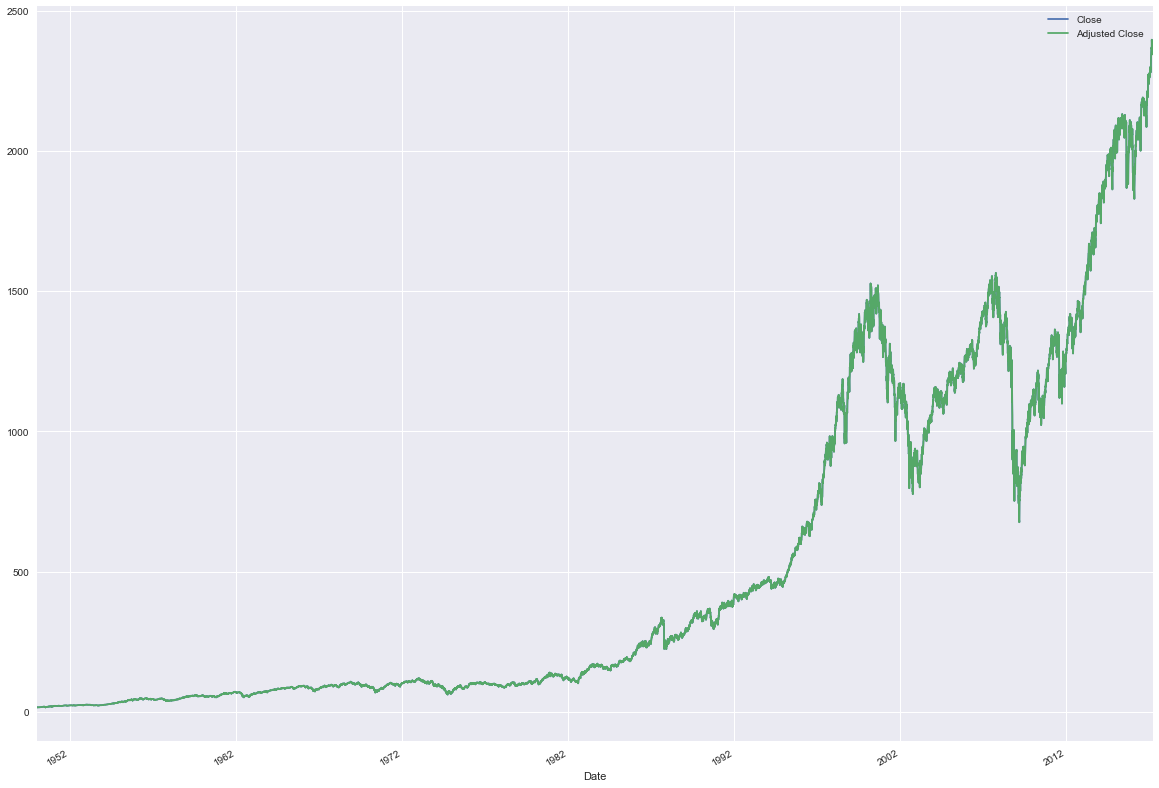

In [7]:
share.plot(['Close', 'Adjusted Close'], figsize = figsize)

### Statistics

#### Global Mean
In order to plot the **global mean** of the stock, we could do the same as follows:

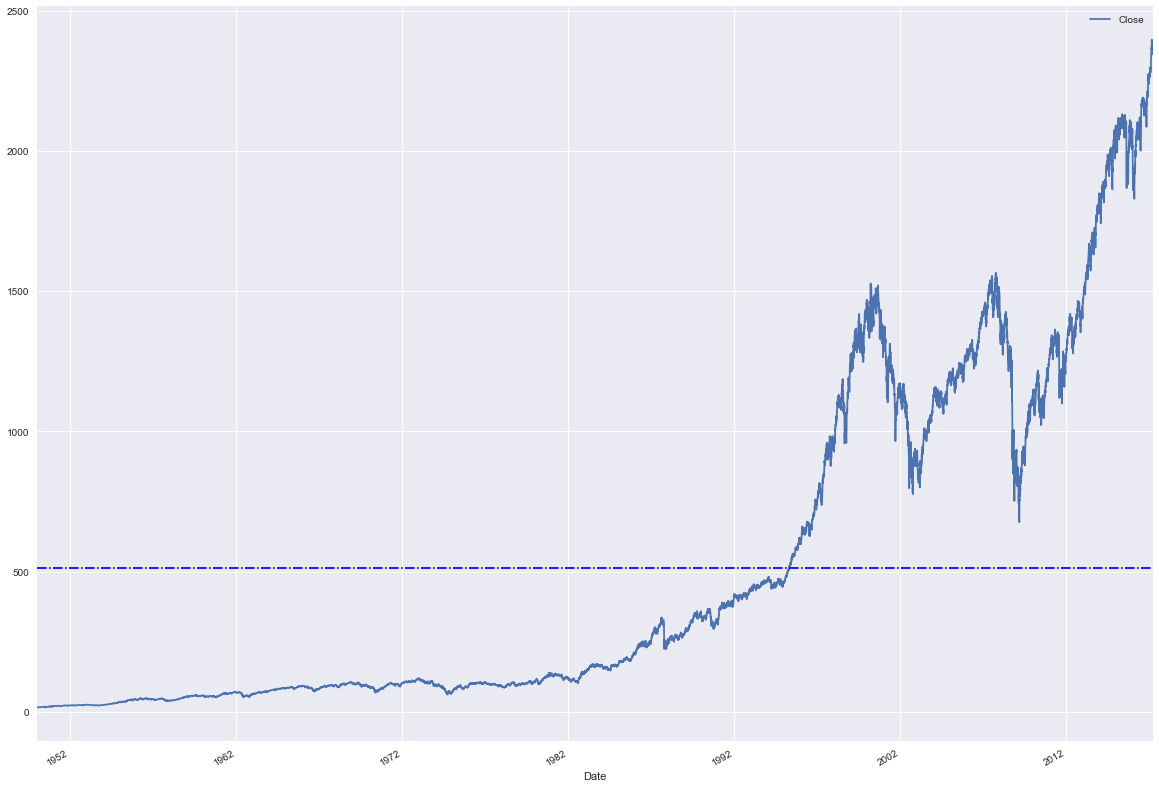

In [8]:
share.plot(figsize = (20, 15), global_mean = True)

#### Moving Averages and Bollinger Bands (R)

In [9]:
bands = share.bollinger_bands(period = 50, bandwidth = 2)
bands.tail(nsamples)

,Lower (Close),Mean (Close),Upper (Close)
Date,,,
2017-03-15,2228.349855,2317.998599,2407.647343
2017-03-16,2230.779135,2320.469595,2410.160054
2017-03-17,2232.640436,2322.619595,2412.598753
2017-03-20,2234.960379,2324.708994,2414.457609
2017-03-21,2237.213123,2326.049795,2414.886467


array([<matplotlib.axes._subplots.AxesSubplot object at 0x113ccd150>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x113c1e850>], dtype=object)

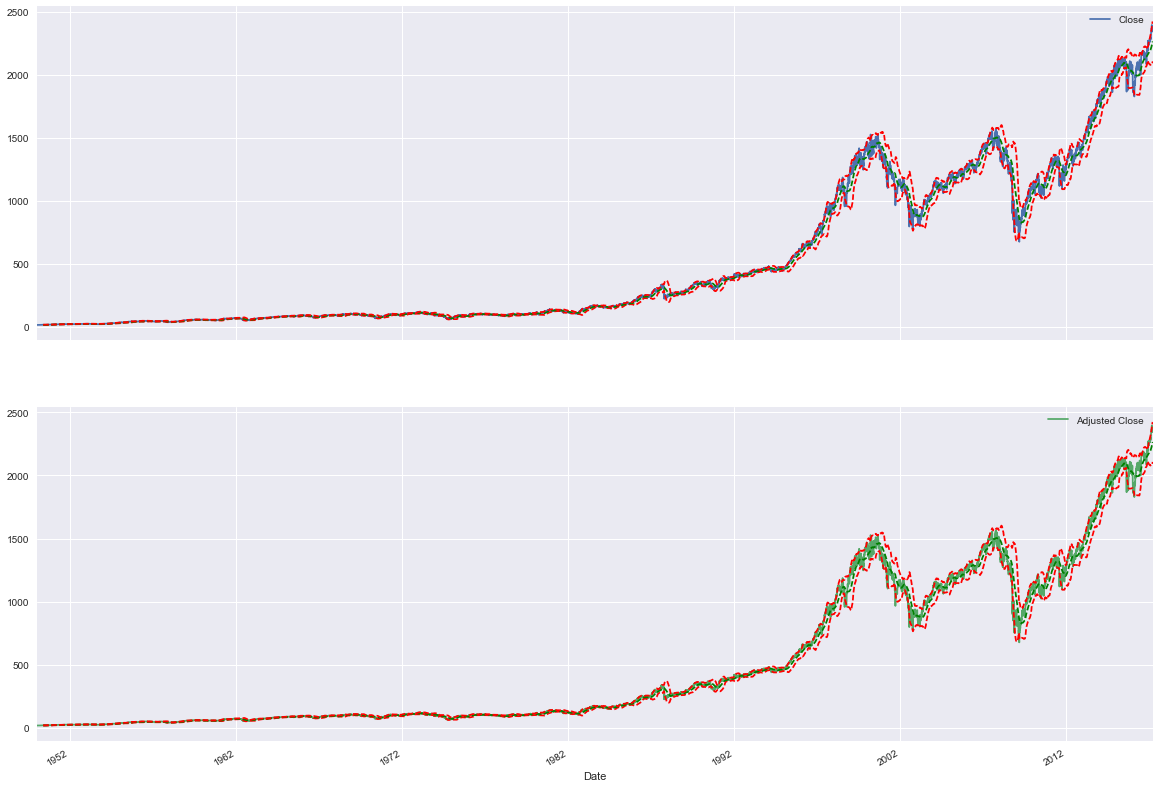

In [10]:
share.plot(['Close', 'Adjusted Close'], figsize = (20, 15), bollinger_bands = True, period = 100, bandwidth = 2)

### Training & Testing

In [11]:
from bulbea.learn.evaluation import split

In [13]:
Xtrain, Xtest, ytrain, ytest = split(share, 'Close', normalize = True)

In [14]:
import numpy as np

In [15]:
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
Xtest  = np.reshape(Xtest,  ( Xtest.shape[0],  Xtest.shape[1], 1))

### Modelling

In [16]:
layers      = [1, 100, 100, 1] # number of neurons in each layer
nbatch      = 512              
epochs      = 5     
nvalidation = 0.05

In [17]:
from bulbea.learn.models import RNN
from bulbea.learn.models.ann import RNNCell

Using TensorFlow backend.


In [18]:
rnn = RNN(layers, cell = RNNCell.LSTM)

#### TRAINING

In [19]:
rnn.fit(Xtrain, ytrain,
        batch_size       = nbatch,
        nb_epoch         = epochs,
        validation_split = nvalidation)

Train on 9543 samples, validate on 503 samples
Epoch 1/5
9543/9543 [==============================] - 93s - loss: 0.0178 - val_loss: 5.7537e-04

#### TESTING

In [20]:
predicted = rnn.predict(Xtest)

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
mean_squared_error(ytest, predicted)

0.00036728505759597515

In [33]:
ytest=ytest.reshape([ytest.shape[0]])
ytest.shape

(6698,)

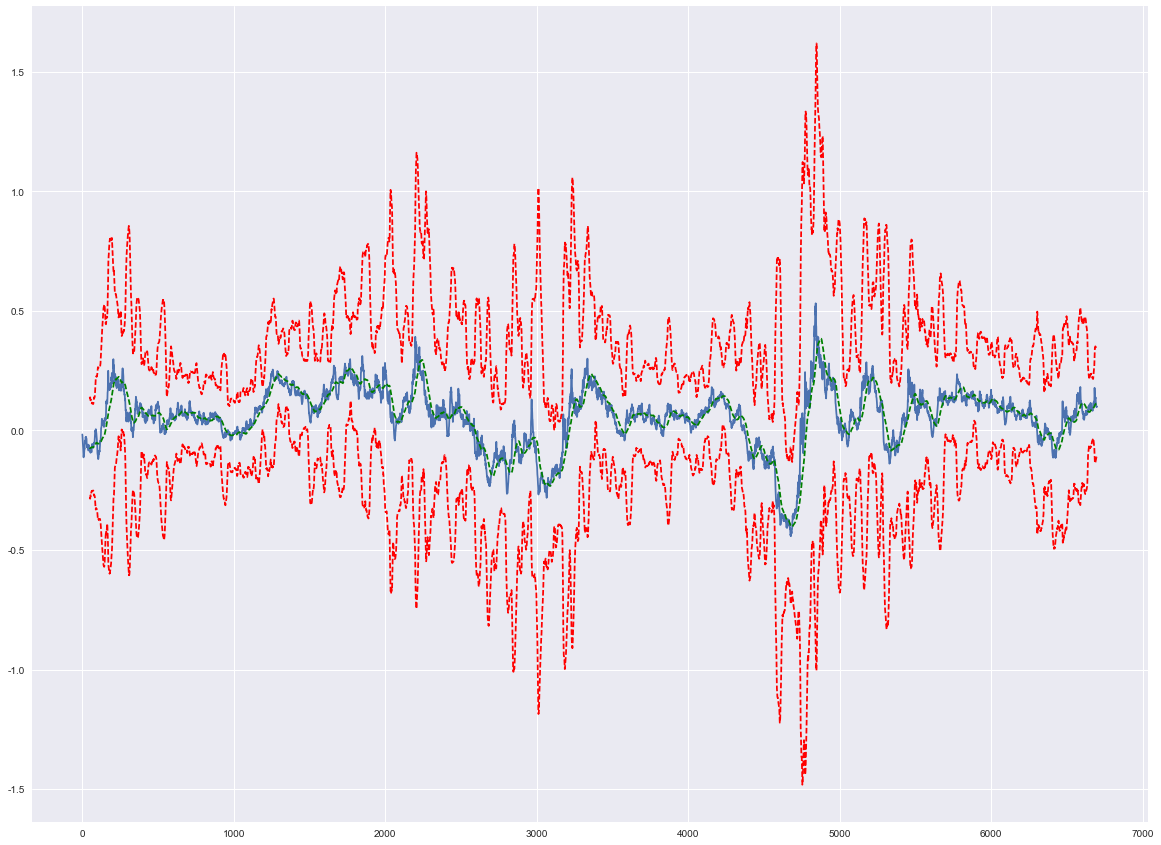

In [35]:
from bulbea.entity.share import _plot_bollinger_bands
import pandas as pd
import matplotlib.pyplot as pplt

figsize          = (20, 15)
figure           = pplt.figure(figsize = figsize)

axes             = figure.add_subplot(111)

series           = pd.Series(data = ytest)

# axes.plot(scaler.inverse_transform(ytest))
#axes.plot(scaler.inverse_transform(predicted))
axes.plot(predicted.reshape([predicted.shape[0]]))

_plot_bollinger_bands(series, axes, bandwidth = 10)

### Sentiment Analysis

In [ ]:
s = bb.sentiment(share)
s